## importing libraries...

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import seaborn as sns

## Manipulate Data...

In [3]:
train_df = pd.read_csv("Corona_NLP_train.csv",encoding='latin1')
test_df = pd.read_csv("Corona_NLP_test.csv",encoding='latin1')

train_df.sample(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
10459,14258,59210,Lincolnshire Showground,20-03-2020,Have a Covid 19 safe weekend and don t forget ...,Extremely Negative
11985,15784,60736,"London, England",20-03-2020,@piersmorgan everyone is doing these panic buy...,Extremely Negative
33254,37053,82005,"Sydney, New South Wales",07-04-2020,Prices for the most important staples like #ri...,Positive
10435,14234,59186,NaN,20-03-2020,Every year shoppers ram raid stores to buy 50i...,Positive
8396,12195,57147,"San Borja - Lima, Peru",19-03-2020,Here are the facts about Coronavirus according...,Neutral
33447,37246,82198,"Oklahoma City, OK",08-04-2020,For our economy to have been so great it sure ...,Extremely Positive
7822,11621,56573,Michigan,19-03-2020,I went to the grocery store this morning and t...,Neutral
16791,20590,65542,NaN,22-03-2020,Dating in 2020.\r\r\n\r\r\nHim: Hey girl. I ha...,Negative
17861,21660,66612,India,23-03-2020,Not providing milk to the buyers by reserving ...,Neutral
29974,33773,78725,"Adelaide, South Australia",06-04-2020,So you've bought something online Â but will ...,Negative


In [4]:
# cheking the shape of data....
print(f"Train data-set has {train_df.shape[0]} rows and {train_df.shape[1]} columns \n")
print(f"Test data-set has {test_df.shape[0]} rows and {test_df.shape[1]} columns")

Train data-set has 41157 rows and 6 columns 

Test data-set has 3798 rows and 6 columns


In [5]:
# checking the dtypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [12]:
# checking the label proportion around the data...
labels_prop = train_df["Sentiment"].value_counts()
labels_prop

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

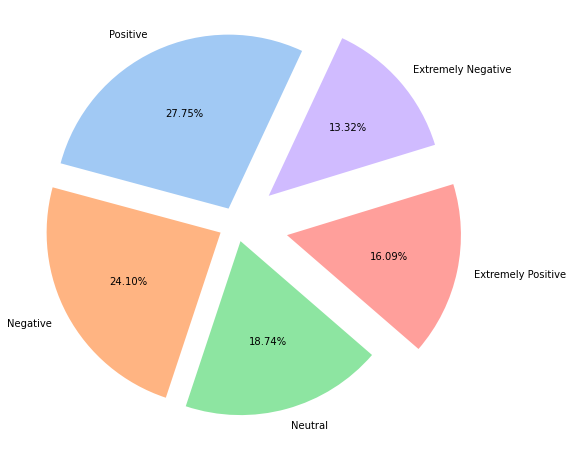

In [17]:
# let's visualize it...
labels = labels_prop.index
colors = sns.color_palette('pastel') # pastel colors
plt.figure(figsize=(10,8))
plt.pie(labels_prop,labels=labels,colors=colors,explode=[0.1,0.1,0.1,0.3,0.25],startangle=65,autopct="%0.2f%%");

In [21]:
# let's visualize the location....
location_prop = train_df["Location"].value_counts()
location_prop

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

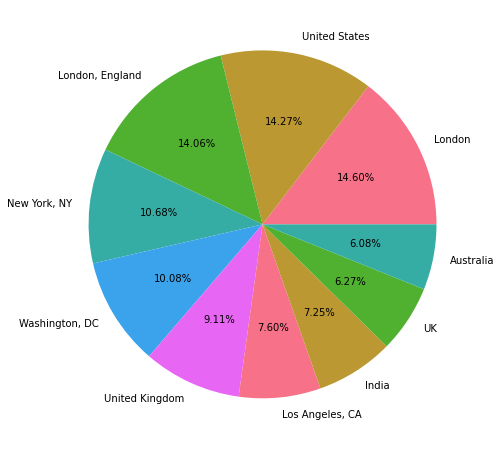

In [38]:
#  just visualize the top 10 location of the data....
labels = location_prop.index[:10]
colors = sns.color_palette("husl")
plt.figure(figsize=(10,8))
plt.pie(location_prop[:10],labels=labels,colors=colors,autopct="%.2f%%",);

In [39]:
# calculate the tweet length
train_df["Length"] = train_df["OriginalTweet"].apply(len)
train_df.sample(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Length
30486,34285,79237,"Fairfield, CA",06-04-2020,We got this Fairfield! ??\r\r\n\r\r\nKeep safe...,Positive,296
29243,33042,77994,"New York, NY",05-04-2020,A Supermarket Chain Was One Of The First To An...,Extremely Positive,223
25646,29445,74397,"Falls Church, VA",01-04-2020,I have to shout @Publix grocery store ? you gu...,Extremely Positive,210
38497,42296,87248,NAIROBI,11-04-2020,Donations will lead to corruption &amp; petty ...,Negative,277
14808,18607,63559,"Satellite of Love, Scotland",22-03-2020,I've managed to stay indoors for roughly 6 day...,Positive,298
6725,10524,55476,"Graz, Austria",19-03-2020,#COVID19 shows limits to humanity: itÂs urgen...,Negative,232
3359,7158,52110,"Yuma, AZ",18-03-2020,@Valerie_Dormer During the #quarenteen for #co...,Negative,255
71,3870,48822,NaN,16-03-2020,"Hi, COVID-19. Thanks for making me do more onl...",Positive,59
30317,34116,79068,Canberra,06-04-2020,Take only what you need and add what you can i...,Positive,249
15959,19758,64710,"Kentucky, USA",22-03-2020,Was wondering what everyoneÂs gas prices are?...,Positive,157


<Figure size 720x720 with 0 Axes>

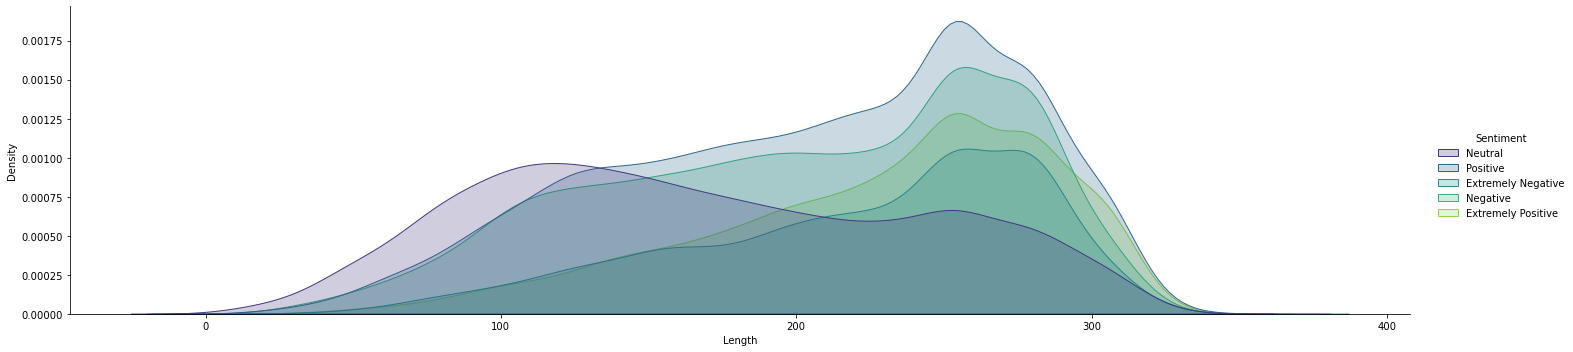

In [58]:
# visualize the tweet length accross the data-set...
plt.figure(figsize=(10,10))
sns.displot(data=train_df,x="Length",hue="Sentiment",
                 kind = 'kde', fill = True,  aspect =4 , palette = "viridis");


In [51]:
# changing the datetime dtype ...
train_df["TweetAt"] = pd.to_datetime(train_df["TweetAt"],format="%Y-%m-%d")
train_df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Length
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,237
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,131
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,306
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310


In [52]:
train_df["TweetAt"].min()

Timestamp('2020-01-04 00:00:00')

In [49]:
train_df["TweetAt"].max()

datetime.date(2020, 12, 4)

In [ ]:
# checking the tweets per day
tweet_per_day